### Supermarket Sales Anlysis

In [1]:
# Supermarket Sales Analysis

## Importing Libraries and Loading Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os

# Load the dataset

os.chdir(r"C:\Users\Dhruv\Documents\Anudip Foundation\Data Analytics\Python Project")
data = pd.read_csv("supermarket_sales.csv")

In [2]:
# Display initial rows and dataset info
print(data.head())
print(data.info())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [3]:
data.shape # rows and columns of the dataset

(1000, 17)

In [4]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
## Data Cleaning
# Check for missing values and duplicates
print("Missing values:")
print(data.isnull().sum())

print("\nDuplicates:")
print(data.duplicated().sum())

Missing values:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Duplicates:
0


In [6]:
# Convert 'Date' and 'Time' columns to appropriate formats
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')

print("\nData types after conversion:")
print(data.dtypes)


Data types after conversion:
Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                            int64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                       datetime64[ns]
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object


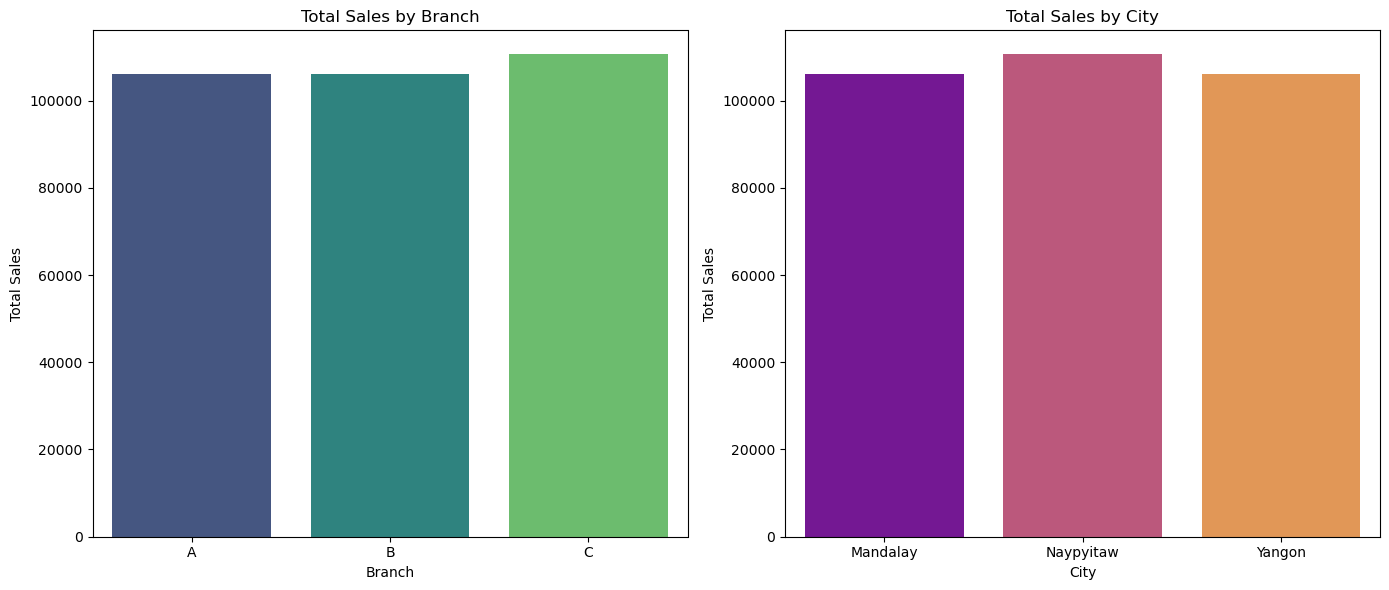

In [7]:
## Exploratory Data Analysis (EDA)

### Total Sales by Branch and City
# Sales by Branch
branch_sales = data.groupby('Branch')['Total'].sum()

# Sales by City
city_sales = data.groupby('City')['Total'].sum()

# Visualization
plt.figure(figsize=(14, 6))

# Branch Sales
plt.subplot(1, 2, 1)
sns.barplot(x=branch_sales.index, y=branch_sales.values, palette='viridis')
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales')
plt.xlabel('Branch')

# City Sales
plt.subplot(1, 2, 2)
sns.barplot(x=city_sales.index, y=city_sales.values, palette='plasma')
plt.title('Total Sales by City')
plt.ylabel('Total Sales')
plt.xlabel('City')

plt.tight_layout()
plt.show()

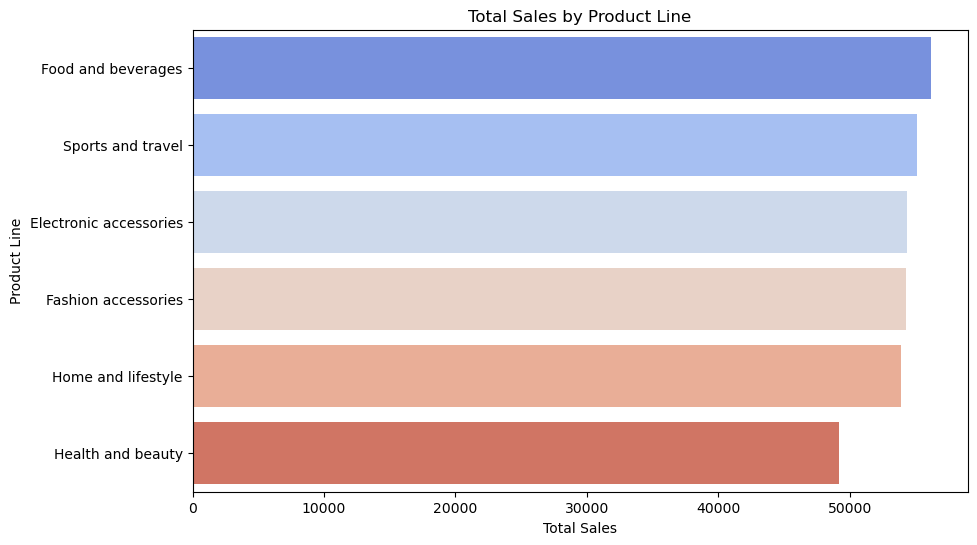

In [8]:
### Sales by Product Line
product_sales = data.groupby('Product line')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.values, y=product_sales.index, palette='coolwarm')
plt.title('Total Sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.show()

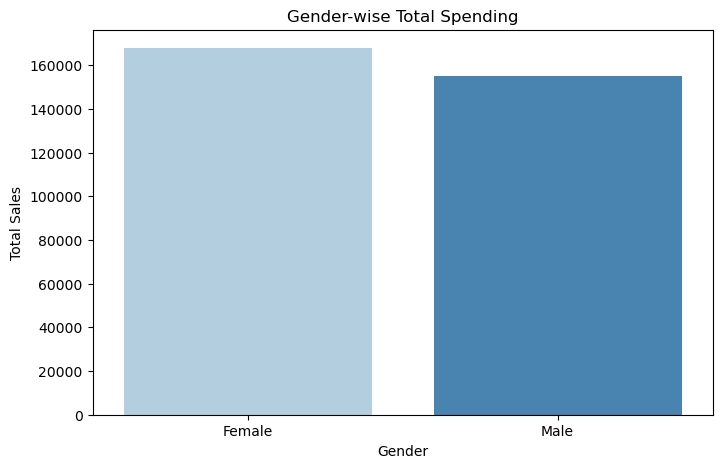

In [9]:
### Gender-wise Spending
gender_sales = data.groupby('Gender')['Total'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='Blues')
plt.title('Gender-wise Total Spending')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.show()

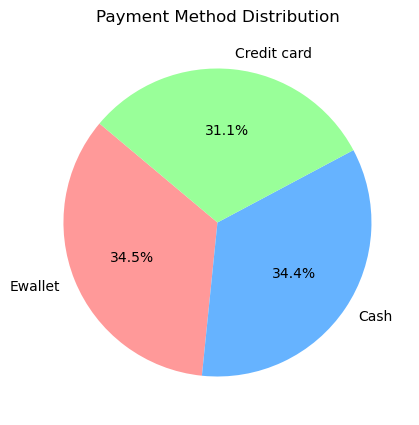

In [10]:
### Payment Method Preferences
payment_methods = data['Payment'].value_counts()
plt.figure(figsize=(8, 5))
payment_methods.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'], startangle=140)
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

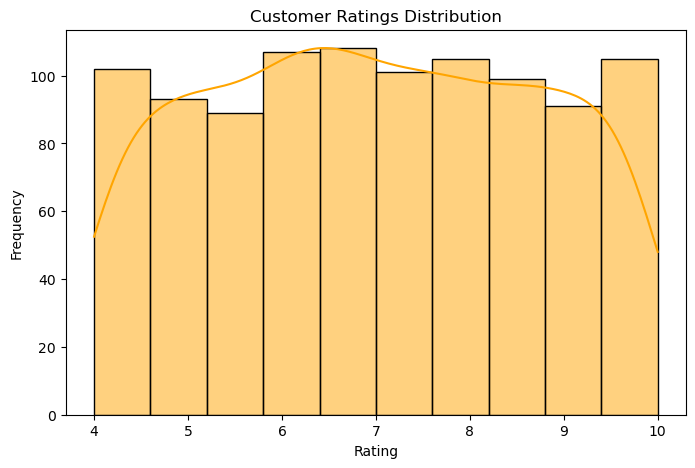

In [11]:
### Customer Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Rating'], bins=10, kde=True, color='orange')
plt.title('Customer Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

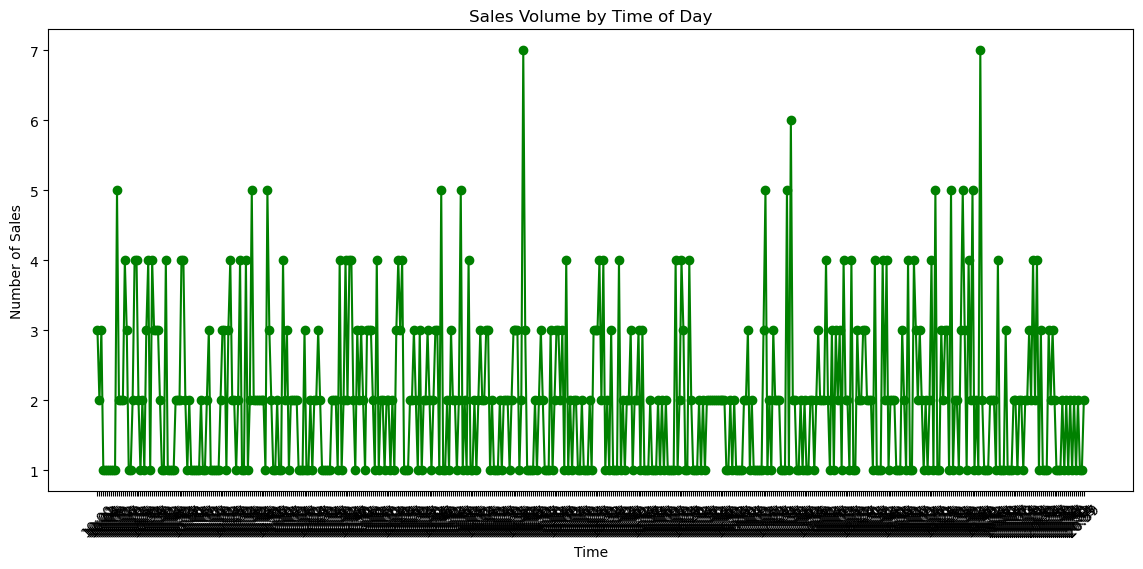

In [12]:
### Peak Sales Times
sales_by_time = data['Time'].dt.strftime('%H:%M').value_counts().sort_index()
plt.figure(figsize=(14, 6))
plt.plot(sales_by_time.index, sales_by_time.values, marker='o', color='green')
plt.title('Sales Volume by Time of Day')
plt.xlabel('Time')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()

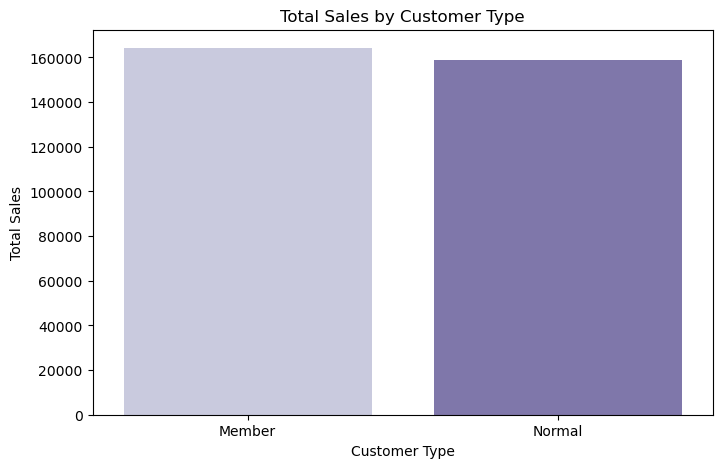

In [13]:
### Membership vs. Normal Customer Sales
customer_type_sales = data.groupby('Customer type')['Total'].sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=customer_type_sales.index, y=customer_type_sales.values, palette='Purples')
plt.title('Total Sales by Customer Type')
plt.ylabel('Total Sales')
plt.xlabel('Customer Type')
plt.show()

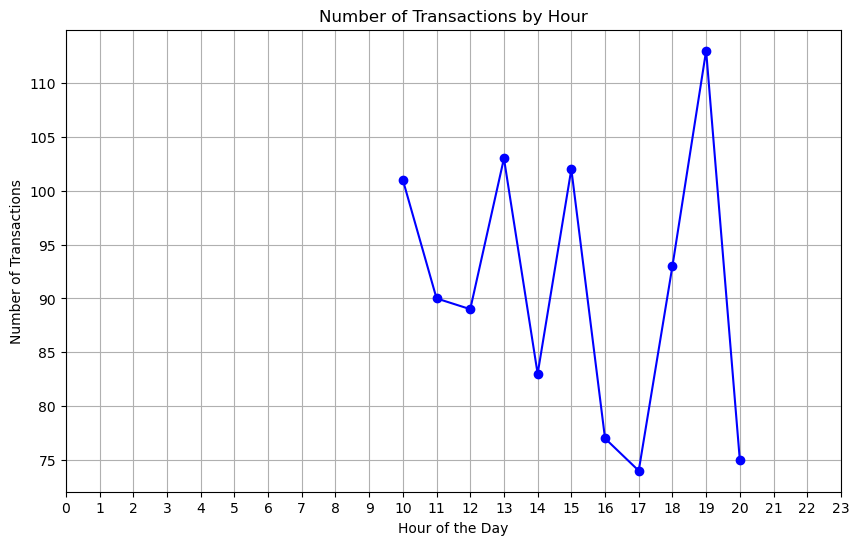

The hour with the highest number of transactions is: 19:00


In [14]:
# Convert the 'Time' column to hour format for grouping
data['Hour'] = data['Time'].dt.hour

# Group by hour and calculate the total number of transactions
sales_by_hour = data.groupby('Hour').size()

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(sales_by_hour.index, sales_by_hour.values, marker='o', color='blue')
plt.title('Number of Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Ensure all hours are labeled
plt.grid()
plt.show()

# Identify the hour with the highest transactions
peak_hour = sales_by_hour.idxmax()
print(f"The hour with the highest number of transactions is: {peak_hour}:00")

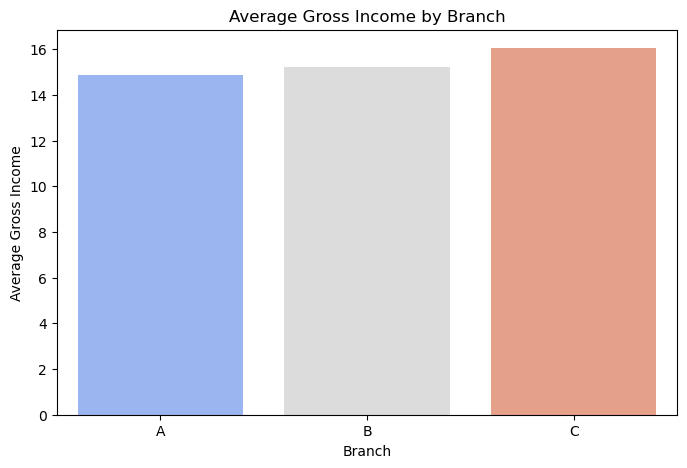

In [15]:
### Average Gross Income Across Branches
# Calculate and visualize average gross income by branch
branch_gross_income = data.groupby('Branch')['gross income'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=branch_gross_income.index, y=branch_gross_income.values, palette='coolwarm')
plt.title('Average Gross Income by Branch')
plt.ylabel('Average Gross Income')
plt.xlabel('Branch')
plt.show()

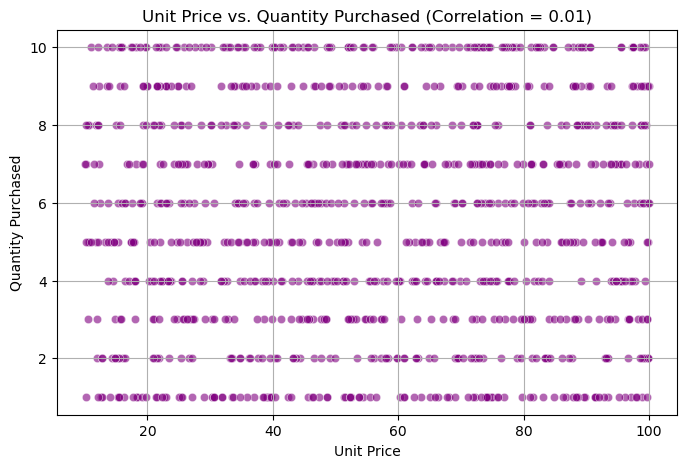

In [16]:
### Unit Price vs. Quantity Purchased
# Calculate and visualize the relationship
unit_price_quantity_correlation = data[['Unit price', 'Quantity']].corr().iloc[0, 1]
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Unit price'], y=data['Quantity'], color='purple', alpha=0.6)
plt.title(f'Unit Price vs. Quantity Purchased (Correlation = {unit_price_quantity_correlation:.2f})')
plt.xlabel('Unit Price')
plt.ylabel('Quantity Purchased')
plt.grid()
plt.show()

In [17]:
# Pivot table for average sales by branch and product line
pivot_avg_sales = data.pivot_table(values='Total', index='Branch', columns='Product line', aggfunc='mean')
print("\nAverage Sales by Branch and Product Line:")
print(pivot_avg_sales)


Average Sales by Branch and Product Line:
Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                                          
A                         305.285225           320.245265          295.915526   
B                         310.026245           264.730911          304.297770   
C                         344.890445           331.693385          360.103864   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Branch                                                                  
A                    268.037298          344.879931         328.350839  
B                    376.993585          350.983290         322.390306  
C                    319.525500          308.790067         350.265067  


In [18]:
# Pivot table for total quantity sold by gender and product line
pivot_qty_gender = data.pivot_table(values='Quantity', index='Gender', columns='Product line', aggfunc='sum')
print("\nTotal Quantity Sold by Gender and Product Line:")
print(pivot_qty_gender)


Total Quantity Sold by Gender and Product Line:
Product line  Electronic accessories  Fashion accessories  Food and beverages  \
Gender                                                                          
Female                           488                  530                 514   
Male                             483                  372                 438   

Product line  Health and beauty  Home and lifestyle  Sports and travel  
Gender                                                                  
Female                      343                 498                496  
Male                        511                 413                424  


## Conclusion
 The supermarket sales analysis revealed Branch C as the top performer in revenue, with "Electronic Accessories" being the highest-grossing product line. Sales peak during the afternoon, and female customers spend more on average than males. Digital payments, especially "Ewallets," are the most preferred method, reflecting a shift toward cashless transactions. Membership programs drive higher spending, while Branch C also leads in average gross income. No significant correlation was found between customer ratings and sales, but unit price showed a slight positive relationship with quantity purchased. These insights can guide targeted marketing, optimize product offerings, and improve customer engagement strategies.






